In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split

In [2]:
df_all = pd.read_csv('complete2.csv',low_memory = False)
df_all.head()

,hour,east_side,west_side,temperature,humidity,pressure,wind_direction,wind_speed,work_status,day_of_week,season
0,0.0,2.0,5.0,7.42,87.0,1003.0,0.0,0.0,1.0,Fri,Fall
1,1.0,1.0,0.0,7.78,87.0,1003.0,0.0,1.0,1.0,Fri,Fall
2,2.0,1.0,0.0,8.13,87.0,1003.0,160.0,2.0,1.0,Fri,Fall
3,3.0,1.0,0.0,8.24,64.0,1025.0,270.0,10.0,1.0,Fri,Fall
4,4.0,2.0,6.0,8.66,68.0,1019.0,309.0,5.0,1.0,Fri,Fall


In [3]:
df_all = pd.get_dummies(data=df_all, columns=['day_of_week', 'hour','season'])

In [6]:
df_all.shape

(43825, 43)

### East Model

In [9]:
df_east = df_all.drop('west_side',axis=1)
df_east = df_east[df_east.east_side <=200]

In [12]:
east_X = df_east.drop('east_side',axis=1)
east_Y = df_east['east_side']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(east_X, east_Y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [18]:
rf_regr_model = RandomForestRegressor()
parameters = {'n_estimators':[100, 200, 300, 400, 500], 'max_depth':[10, 20, 30, 40, 50]}
clf = GridSearchCV(rf_regr_model, parameters, cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
test_result = clf.best_estimator_.predict(X_test)
test_result

array([ 7.57811821,  7.05170406, 47.92744193, ..., 34.99815815,
        7.05170406, 11.42958198])

In [20]:
# Function to plot the true/prediction value¶
def plot_result(pred_value, y_test):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(len(pred_value)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(pred_value)),pred_value,'ro-',label='predict value')
#     plt.title(model)
#     plt.xlabel('Record_index')
#     plt.ylabel('Y_xalue')
#     plt.legend()
    plt.show()

In [21]:
mean_squared_error(y_true=y_test, y_pred=test_result)

314.7263239325956

In [22]:
mean_absolute_error(y_true=y_test, y_pred=test_result)

10.672382265521023

In [23]:
r2_score(y_true=y_test, y_pred=test_result)

0.8189350437374084

In [25]:
rdm_idx = list(range(0,len(y_test)))
random.shuffle(rdm_idx)
rdm_idx = rdm_idx[:200]
east_true = y_test.iloc[rdm_idx]
east_pred = list(test_result[rdm_idx])

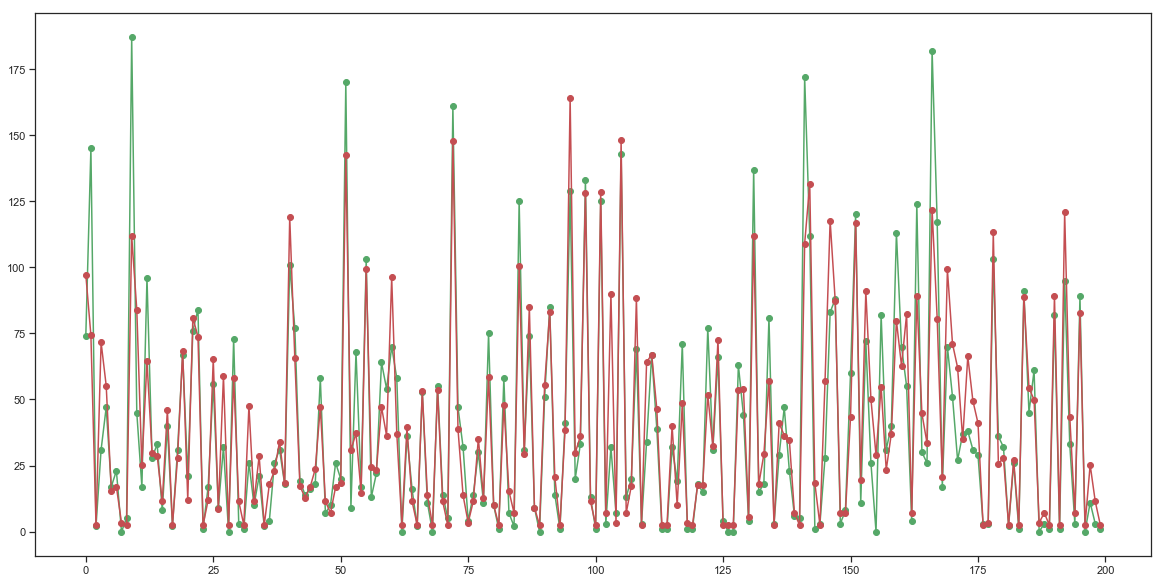

In [26]:
plot_result(pred_value=east_pred, y_test=east_true)

In [27]:
import pickle

filename = 'gaoshunan_east_model.sav'
pickle.dump(clf.best_estimator_, open(filename, 'wb'))

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.predict(X_test)